In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/MyDrive/src/XAI-CV-CounterfactualSamples

In [ ]:
%cd XAI-CV-CounterfactualSamples

/content/drive/MyDrive/src/XAI-CV-CounterfactualSamples


In [ ]:
%cd exp_breakhis

/content/drive/MyDrive/src/XAI-CV-CounterfactualSamples/exp_breakhis


# Initialization

In [ ]:
# import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import glob
import os
from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import configs

In [ ]:
files = glob.glob('outputs/features/*/*/*/*/*/*.feat.npy')
files.sort()
print(len(files))

7909


In [ ]:
print(files[0])

outputs/features/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.feat.npy


# Clustering

In [ ]:
feat = np.load(files[0])
print(feat.shape)

In [ ]:
feat.nbytes

In [ ]:
class FeatureClustering():
  def __init__(self,
               in_dir,
               save_dir=None,
               subset_filename=None,
               subset=None,
               k_range=range(2, 33, 2),
               disease=None):
    self.in_dir = in_dir
    self.save_dir = save_dir
    self.disease = disease

    self.subset_filename = subset_filename
    self.df_files = None
    self.subset = subset
    self.files = None

    self.k_range = k_range
    self.features = None
    self.besk_k = 0

  def load_features(self):
    df_files = pd.read_csv(self.subset_filename, header='infer')
    self.df_files = df_files
    df_files = df_files[df_files['grp'] == self.subset]
    df_files = df_files[df_files['classname'] == self.disease]

    files = df_files['filename'].tolist()
    # malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-12773/40X/SOB_M_MC-14-12773-40-021.png
    files = [os.path.join(self.in_dir, it.replace('.png', '.feat.npy'))
                     for it in files]
    print(self.in_dir)
    print(len(files), 'found')
    files.sort()
    print(files[0])
    self.files = files
    self.features = [np.load(it).reshape(-1) for it in files]
    return self.features

  def compute_avg_distance(self, features,
                                 centroids,
                                 predictions):
    nfeats = np.array(features)
    ncents = np.array([centroids[it] for it in predictions])
    return np.mean((nfeats - ncents)**2)

  def cluster(self, k):
    model = KMeans(n_clusters=k, init='random')
    model.fit(self.features)
    centroids = model.cluster_centers_
    predictions = model.labels_
    avg_distance = self.compute_avg_distance(self.features,
                                        centroids,
                                        predictions)
    print(k, avg_distance)
    return k, avg_distance, centroids

  def run(self):
    self.load_features()
    ks, avg_distances, centroids = [], [], []
    for i_k in self.k_range:
      k, avg_dist, cents = self.cluster(i_k)
      ks.append(k)
      avg_distances.append(avg_dist)
      centroids.append(cents)

    self.plot(ks, avg_distances)
    index = avg_distances.index(min(avg_distances))
    best_k = ks[index]
    print('best_k:', k, min(avg_distances))
    self.best_k = best_k
    self.save()
    return best_k, min(avg_distances)

  def plot(self, ks, distances):
    plt.plot(ks, distances)
    plt.show()

  def save(self):
    k, avg_dist, centroids = self.cluster(self.best_k)
    if not os.path.exists(self.save_dir):
      os.makedirs(self.save_dir)
    filename = self.save_dir+'/centroids_%s_%d.npy'%(self.disease, k)
    np.save(filename, centroids)
    print(filename, 'saved')

outputs/features/
407 found
outputs/features/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-10147/100X/SOB_M_MC-14-10147-100-002.feat.npy
2 2.608714205361875
4 2.3424725501489063
6 2.2476544169846995
8 2.1335244584398643
10 2.074792769873123
12 2.0474871070639935
14 1.9952056345088793
16 1.9783909655222343
18 1.9254013220310424
20 1.8977488736638295
22 1.8648523967073123
24 1.8567457433895809
26 1.828874342468957
28 1.7885145277976988
30 1.7799967138799717
32 1.7712971561874196


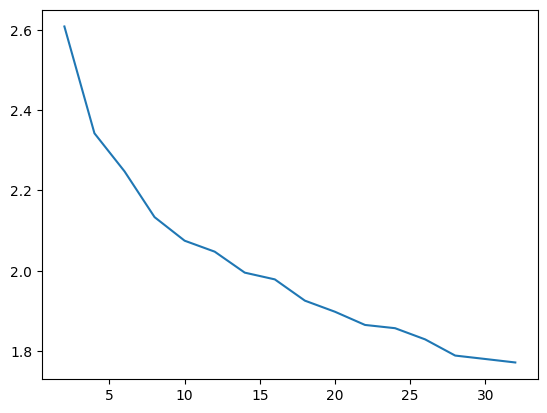

best_k: 32 1.7712971561874196
32 1.7674154228760768
outputs/centroids-feature-classifier256//centroids_mucinous_carcinoma_32.npy saved
outputs/features/
1780 found
outputs/features/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/100X/SOB_M_DC-14-10926-100-004.feat.npy
2 2.242966696925938
4 2.1394756256007574
6 2.082475108364147
8 2.0448813031394657
10 2.0144958464534515
12 1.9932917134390011
14 1.9710139037456582
16 1.94687211580753
18 1.929204120838782
20 1.916809469860564
22 1.91645910528399
24 1.8869174326526554
26 1.8886733797142174
28 1.8786385484744765
30 1.872009162207059
32 1.8589879764607713


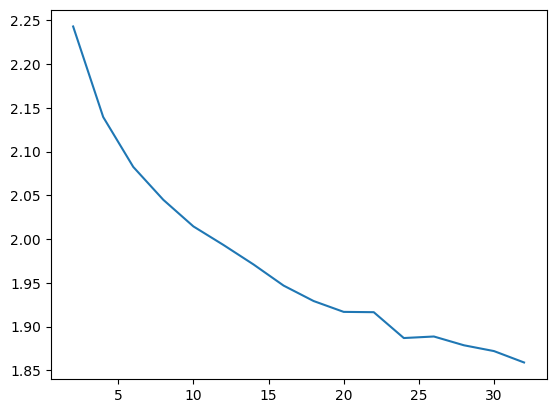

best_k: 32 1.8589879764607713
32 1.8565360093778225
outputs/centroids-feature-classifier256//centroids_ductal_carcinoma_32.npy saved
outputs/features/
206 found
outputs/features/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-006.feat.npy
2 1.4709662711865197
4 1.3622889606150015
6 1.313145050611475
8 1.2570638872788609
10 1.2355452356309975
12 1.2194230505713672
14 1.182468644614593
16 1.1639514006687328
18 1.1470862689297971
20 1.1300464522782896
22 1.103780842669709
24 1.0850668130306924
26 1.068366394463136
28 1.0537433604196402
30 1.025852895023634
32 1.018743255163846


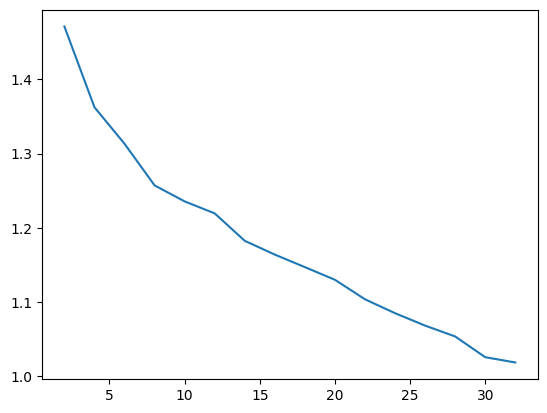

best_k: 32 1.018743255163846
32 1.0119492509489847
outputs/centroids-feature-classifier256//centroids_adenosis_32.npy saved
outputs/features/
310 found
outputs/features/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-12204/100X/SOB_M_LC-14-12204-100-015.feat.npy
2 1.6517117967163835
4 1.4783825996346822
6 1.3719877575333441
8 1.3386667427544907
10 1.3061232393392541
12 1.2921775108424993
14 1.250659571654056
16 1.2531021196970424
18 1.2105064234209997
20 1.1918531061109954
22 1.1848600007041659
24 1.1702041136381485
26 1.1483241114953309
28 1.146326307965981
30 1.1349327167643033
32 1.119292615826159


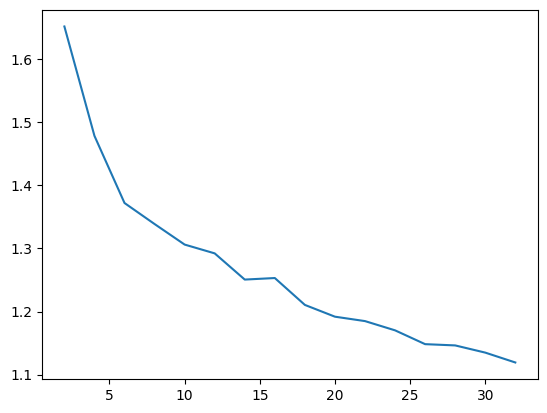

best_k: 32 1.119292615826159
32 1.1035401661515323
outputs/centroids-feature-classifier256//centroids_lobular_carcinoma_32.npy saved
outputs/features/
513 found
outputs/features/benign/SOB/fibroadenoma/SOB_B_F_14-14134/100X/SOB_B_F-14-14134-100-004.feat.npy
2 2.0275793594394522
4 1.8229797848275344
6 1.7472769276703335
8 1.6824254320862086
10 1.639954609583238
12 1.6137070691640463
14 1.5924930221012517
16 1.5773830131263247
18 1.5414350102757257
20 1.5353873300768264
22 1.5157194279705162
24 1.4988330074555185
26 1.493109342204116
28 1.4695404766308329
30 1.4746073186393274
32 1.4570812593084435


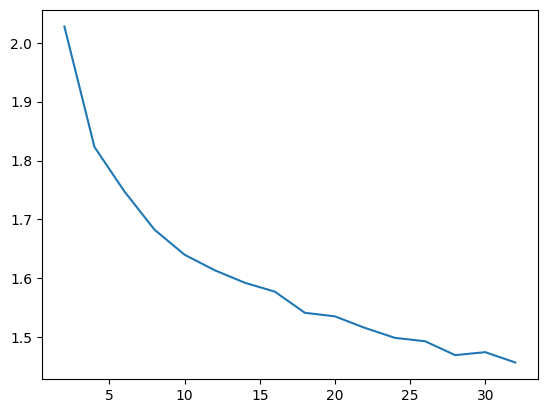

best_k: 32 1.4570812593084435
32 1.4501038661967551
outputs/centroids-feature-classifier256//centroids_fibroadenoma_32.npy saved
outputs/features/
226 found
outputs/features/benign/SOB/phyllodes_tumor/SOB_B_PT_14-21998AB/100X/SOB_B_PT-14-21998AB-100-002.feat.npy
2 2.398338146125195
4 2.177095346265148
6 2.0646852803336366
8 1.9962882791612626
10 1.956785167742803
12 1.8884985022940548
14 1.8477317272363203
16 1.8191531409734285
18 1.7647697837682914
20 1.7348612000266863
22 1.6942757769941068
24 1.6893584044600016
26 1.64033184191265
28 1.6025451811248308
30 1.5757606877134755
32 1.5637348376532978


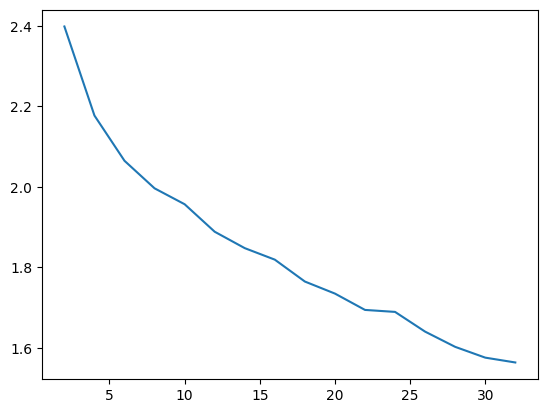

best_k: 32 1.5637348376532978
32 1.5487456930376435
outputs/centroids-feature-classifier256//centroids_phyllodes_tumor_32.npy saved
outputs/features/
284 found
outputs/features/benign/SOB/tubular_adenoma/SOB_B_TA_14-13200/100X/SOB_B_TA-14-13200-100-002.feat.npy
2 2.040118862961793
4 1.7967573587495707
6 1.7070132568057115
8 1.665378993757129
10 1.6301702816686086
12 1.5912907267941077
14 1.5732593088666502
16 1.5432101397992473
18 1.5132854616932765
20 1.4858571661127766
22 1.4734486882826408
24 1.4533113016356807
26 1.4319819850805102
28 1.418775773450324
30 1.4006082487850997
32 1.3763005150617962


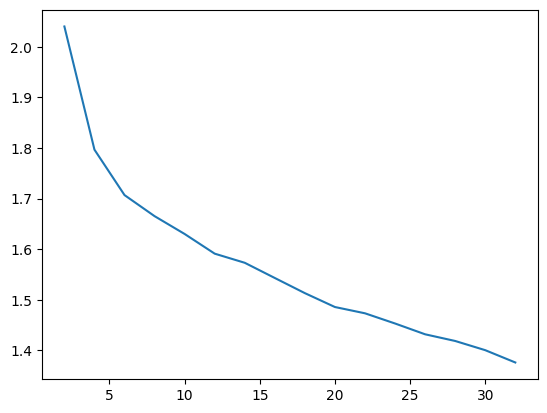

best_k: 32 1.3763005150617962
32 1.3655246292000418
outputs/centroids-feature-classifier256//centroids_tubular_adenoma_32.npy saved
outputs/features/
274 found
outputs/features/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-12465/100X/SOB_M_PC-14-12465-100-001.feat.npy
2 2.069142487662123
4 1.9024156534691152
6 1.8139517214960015
8 1.7708275625707284
10 1.6981409652200112
12 1.675119296639286
14 1.6099300367898384
16 1.6080972697010882
18 1.574376555743249
20 1.544172635879238
22 1.5277163788886807
24 1.501856494011894
26 1.4807576958228195
28 1.4542257943924848
30 1.4453900784500262
32 1.4428302801292605


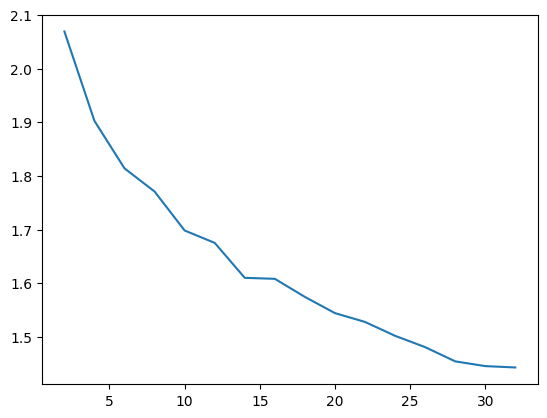

best_k: 32 1.4428302801292605
32 1.431553040748509
outputs/centroids-feature-classifier256//centroids_papillary_carcinoma_32.npy saved


In [ ]:
for disease in configs.CLASS_NAMES:
  featClustering = FeatureClustering(
            in_dir='outputs/features/',
            save_dir='outputs/centroids-feature-classifier256/',
            subset_filename=configs.SUBSETS_FILE,
            subset='train',
            disease=disease)
  featClustering.run()

# Centroid Visualization

In [ ]:
class CentroidVisualizer():
  def __init__(self, in_file):
    self.in_file = in_file
    self.centroids = np.load(self.in_file)

  def map2img(self, amap):
    img = amap.astype(np.uint8)
    return cv2.resize(img, configs.IMAGE_SIZE[:2])

  def plot(self):
    maps = np.reshape(self.centroids, [-1, 8, 8, 2048])
    maps = [np.mean(it, axis=2) for it in maps]
    maps = [(it-np.min(it))/(np.max(it)-np.min(it))*255 for it in maps]
    imgs = [self.map2img(it) for it in maps]

    for i in range(8):
      for j in range(4):
        plt.subplot(4, 8, i*4+j+1)
        plt.imshow(imgs[i*4+j])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

mucinous_carcinoma


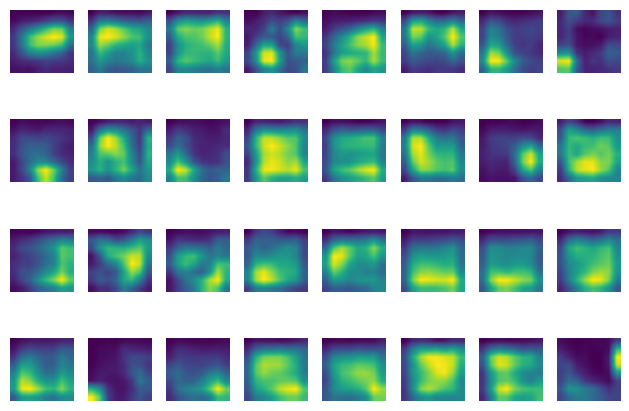

ductal_carcinoma


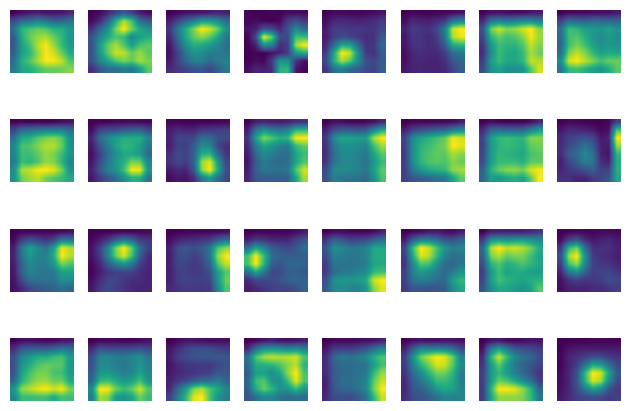

adenosis


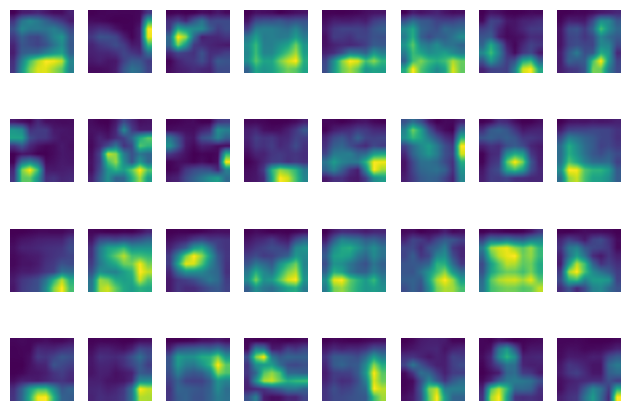

lobular_carcinoma


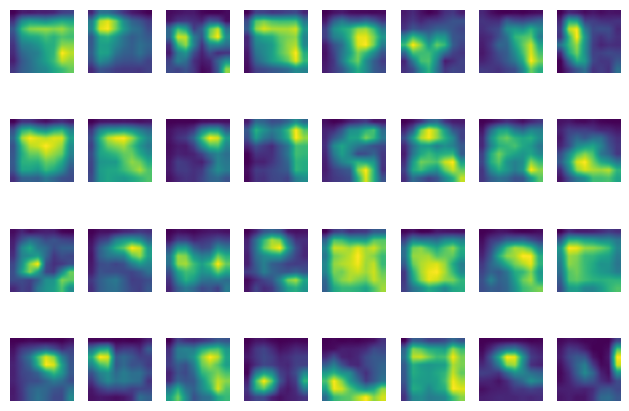

fibroadenoma


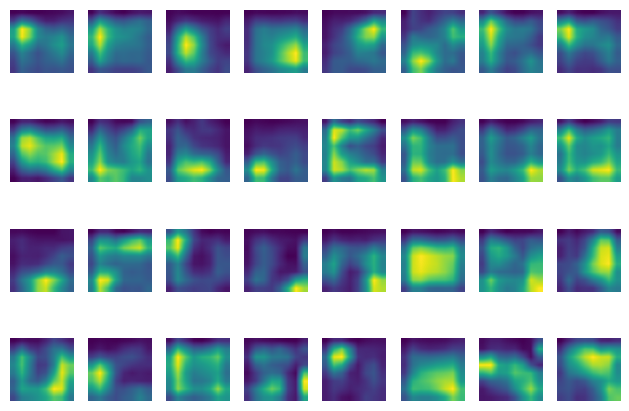

phyllodes_tumor


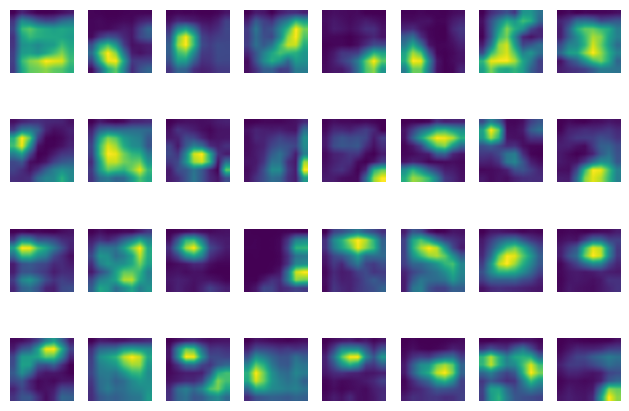

tubular_adenoma


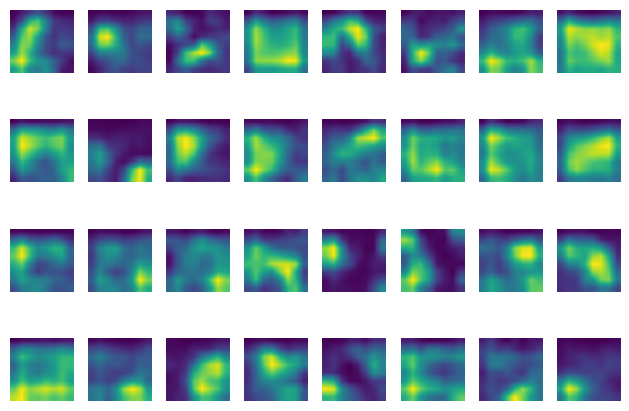

papillary_carcinoma


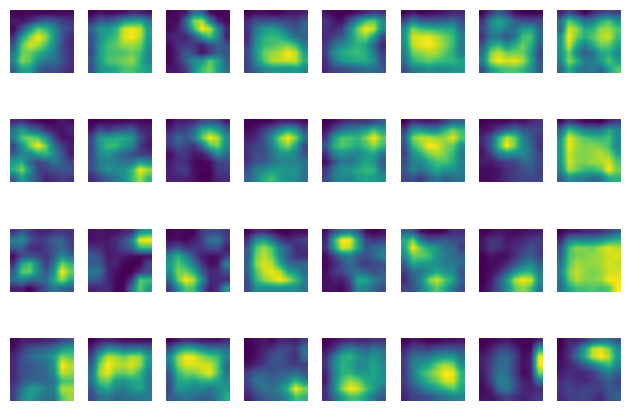

In [ ]:
for disease in configs.CLASS_NAMES:
  print(disease)
  centViz = CentroidVisualizer(f'outputs/centroids-feature-classifier256/centroids_{disease}_32.npy')
  centViz.plot()

# Sample Visualization

In [ ]:
class SampleVisualization():
  def __init__(self, centroids_filename,
                     sample_dir,
                     feature_dir,
                     subset_filename,
                     disease=None,
                     subset='train'):
    self.centroids_filename = centroids_filename
    self.sample_dir = sample_dir
    self.feature_dir = feature_dir
    self.subset_filename = subset_filename
    self.df_filenames = None
    self.df_subset = None
    self.disease = disease
    self.subset = subset
    self.load()

  def load(self):
    self.centroids = np.load(self.centroids_filename)
    print('centroid shape:', self.centroids.shape)

    df_files = pd.read_csv(self.subset_filename, header='infer')
    self.df_filenames = df_files
    df_files = df_files[df_files['grp'] == self.subset]
    df_files = df_files[df_files['classname'] == self.disease]
    files = df_files['filename'].tolist()

    img_filenames = [os.path.join(self.sample_dir, it) for it in files]
    feature_filenames = [
        os.path.join(self.feature_dir, it.replace('.png', '.feat.npy'))
        for it in files]

    self.df_filenames = pd.DataFrame(
        {'img':img_filenames,
         'feature':feature_filenames}
    )

  def compute_distances(self, filenames):
    distances = []
    for feat_filename in filenames:
      feature = np.load(feat_filename).reshape(-1)
      dist = ((self.centroids - feature)**2).sum(axis=1)**.5
      distances.append(dist)
    return np.array(distances), np.argmin(distances, axis=1)

  def load_img_rbg(self, filename):
    img = plt.imread(filename)
    H, W, _ = configs.IMAGE_SIZE
    delta = (W-H)//2
    img = img[:, delta:delta+H, :]
    return cv2.resize(img, configs.IMAGE_SIZE[:2])

  def plot(self, num=4):
    samples = self.df_filenames.sample(n=num)
    distances, centroid_ids = self.compute_distances(samples['feature'])
    for i in range(num):
      plt.subplot(2, 1, 1)
      plt.bar(range(distances[i].shape[0]), distances[i])

      plt.subplot(2, 2, 3)
      plt.imshow(self.load_img_rbg(samples.iloc[i, 0]))
      plt.axis('off')

      plt.subplot(2, 2, 4)
      cent = self.centroids[centroid_ids[i]].reshape([8, 8, 2048])
      cent = np.sum(cent, axis=2)
      cent = cv2.resize(cent, configs.IMAGE_SIZE[:2])
      cent = (cent / np.max(cent) * 255.).astype(np.uint8)
      plt.imshow(cent)
      plt.axis('off')

      plt.tight_layout()
      plt.show()

## adenosis

In [ ]:
disease = 'adenosis'
sampleViz = SampleVisualization(
    f'outputs/centroids-feature-classifier256/centroids_{disease}_32.npy',
    configs.DATA_DIR,
    f'outputs/features/',
    configs.SUBSETS_FILE,
    disease
)
sampleViz.plot(16)

Output hidden; open in https://colab.research.google.com to view.

## fibroadenoma

In [ ]:
disease = 'fibroadenoma'
sampleViz = SampleVisualization(
    f'outputs/centroids-feature-classifier256/centroids_{disease}_32.npy',
    configs.DATA_DIR,
    f'outputs/features/',
    configs.SUBSETS_FILE,
    disease
)
sampleViz.plot(16)

Output hidden; open in https://colab.research.google.com to view.

## phyllodes_tumor

In [ ]:
disease = 'phyllodes_tumor'
sampleViz = SampleVisualization(
    f'outputs/centroids-feature-classifier256/centroids_{disease}_32.npy',
    configs.DATA_DIR,
    f'outputs/features/',
    configs.SUBSETS_FILE,
    disease
)
sampleViz.plot(16)

Output hidden; open in https://colab.research.google.com to view.

## tubular_adenoma

In [ ]:
disease = 'tubular_adenoma'
sampleViz = SampleVisualization(
    f'outputs/centroids-feature-classifier256/centroids_{disease}_32.npy',
    configs.DATA_DIR,
    f'outputs/features/',
    configs.SUBSETS_FILE,
    disease
)
sampleViz.plot(16)

Output hidden; open in https://colab.research.google.com to view.

## ductal_carcinoma

In [ ]:
disease = 'ductal_carcinoma'
sampleViz = SampleVisualization(
    f'outputs/centroids-feature-classifier256/centroids_{disease}_32.npy',
    configs.DATA_DIR,
    f'outputs/features/',
    configs.SUBSETS_FILE,
    disease
)
sampleViz.plot(16)

Output hidden; open in https://colab.research.google.com to view.

## lobular_carcinoma

In [ ]:
disease = 'lobular_carcinoma'
sampleViz = SampleVisualization(
    f'outputs/centroids-feature-classifier256/centroids_{disease}_32.npy',
    configs.DATA_DIR,
    f'outputs/features/',
    configs.SUBSETS_FILE,
    disease
)
sampleViz.plot(16)

Output hidden; open in https://colab.research.google.com to view.

## mucinous_carcinoma

In [ ]:
disease = 'mucinous_carcinoma'
sampleViz = SampleVisualization(
    f'outputs/centroids-feature-classifier256/centroids_{disease}_32.npy',
    configs.DATA_DIR,
    f'outputs/features/',
    configs.SUBSETS_FILE,
    disease
)
sampleViz.plot(16)

Output hidden; open in https://colab.research.google.com to view.

## papillary_carcinoma

In [ ]:
disease = 'papillary_carcinoma'
sampleViz = SampleVisualization(
    f'outputs/centroids-feature-classifier256/centroids_{disease}_32.npy',
    configs.DATA_DIR,
    f'outputs/features/',
    configs.SUBSETS_FILE,
    disease
)
sampleViz.plot(16)

Output hidden; open in https://colab.research.google.com to view.

# Mapping features-concepts

In [26]:
img_filenames = []
centroid_ids = []

for disease in configs.CLASS_NAMES:
  for subset in ['train', 'val', 'test']:
    sampleViz = SampleVisualization(
      f'outputs/centroids-feature-classifier256/centroids_{disease}_32.npy',
      configs.DATA_DIR,
      f'outputs/features/',
      configs.SUBSETS_FILE,
      disease=disease,
      subset=subset
    )
    _, cent_ids = sampleViz.compute_distances(sampleViz.df_filenames['feature'])
    img_filenames += sampleViz.df_filenames['img'].tolist()
    centroid_ids += list(cent_ids)

df = pd.DataFrame({'image':img_filenames,
                   'concept_id':centroid_ids}
      )
df.to_csv('outputs/concept_ids.csv')

centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
centroid shape: (32, 131072)
